In [1]:
# Z poniższych zbiorów danych wybierz jeden i wykonaj na nim analizę: 
# - określ cel badania  
# - uporządkuj dane  
# - wykonaj wstępne przetwarzanie danych  
# - podziel dane na zbiory treningowy i testowy  
# - zbuduj model  
# - oceń model (miary jakości, krzywa ROC, AUC)  
  
# Zbiory danych: 
# - klasyfikacja: cars (caret), segmentationData (caret), baseball (plyr)  
# - grupowanie: storms (dplr), GermanCredit (caret), diabetes (mclust)  
# - reguły asocjacji: mushroom (arules), Adult (arules)  

library(tidyverse)
options(jupyter.rich_display = FALSE,
        repr.plot.width = 15,
        repr.plot.height = 8,
        warn = -1)

library(caret)
data(cars)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




# 0. Cel badania  
- wizualna eksploracja zbioru danych (poćwiczenie ggplota)  
- chciałbym spróbowac zrobic tzw "Sankey Diagram", zobaczymy czy jak pokategoryzuje zmienne to cos z tego wyjdzie
- tbd

# 1. Inspekcja

In [2]:
dim(cars)

[1] 804  18

In [3]:
names(cars)

 [1] "Price"       "Mileage"     "Cylinder"    "Doors"       "Cruise"     
 [6] "Sound"       "Leather"     "Buick"       "Cadillac"    "Chevy"      
[11] "Pontiac"     "Saab"        "Saturn"      "convertible" "coupe"      
[16] "hatchback"   "sedan"       "wagon"      

In [4]:
glimpse(cars)

Rows: 804
Columns: 18
$ Price       <dbl> 22661.05, 21725.01, 29142.71, 30731.94, 33358.77, 30315.17…
$ Mileage     <int> 20105, 13457, 31655, 22479, 17590, 23635, 17381, 27558, 25…
$ Cylinder    <int> 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Doors       <int> 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Cruise      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Sound       <int> 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0…
$ Leather     <int> 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1…
$ Buick       <int> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Cadillac    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Chevy       <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Pontiac     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Saab        <int> 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Saturn      <int

In [5]:
sum(is.na(cars))

[1] 0

wiekszosc kolumn wyglada na typ `bool`, sprawdzam unikalne wartosci

In [6]:
for (column in names(cars)) {
    # dwie pierwszwe kolumny maja numeric, wiec skip
    if (column %in% c("Price", "Mileage")) next 
    print(as.vector(unique(cars[column])))
}

$Cylinder
[1] 6 4 8

$Doors
[1] 4 2

$Cruise
[1] 1 0

$Sound
[1] 0 1

$Leather
[1] 0 1

$Buick
[1] 1 0

$Cadillac
[1] 0 1

$Chevy
[1] 0 1

$Pontiac
[1] 0 1

$Saab
[1] 0 1

$Saturn
[1] 0 1

$convertible
[1] 0 1

$coupe
[1] 0 1

$hatchback
[1] 0 1

$sedan
[1] 1 0

$wagon
[1] 0 1



# 2. Zmiana zmiennych binarnych z typu `int` na `logical`

In [7]:
cars_with_bool_vars <- cars %>%
    mutate(
        Cylinder = as.factor(Cylinder),
        Doors = as.factor(Doors),
        Cruise = as.logical(Cruise),
        Sound = as.logical(Sound),
        Leather = as.logical(Leather),
        Buick = as.logical(Buick),
        Cadillac = as.logical(Cadillac),
        Chevy = as.logical(Chevy),
        Pontiac = as.logical(Pontiac),
        Saab = as.logical(Saab),
        Saturn = as.logical(Saturn),
        convertible = as.logical(convertible),
        coupe = as.logical(coupe),
        hatchback = as.logical(hatchback),
        sedan = as.logical(sedan),
        wagon = as.logical(wagon) 
    )

In [8]:
glimpse(cars_with_bool_vars)

Rows: 804
Columns: 18
$ Price       <dbl> 22661.05, 21725.01, 29142.71, 30731.94, 33358.77, 30315.17…
$ Mileage     <int> 20105, 13457, 31655, 22479, 17590, 23635, 17381, 27558, 25…
$ Cylinder    <fct> 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Doors       <fct> 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Cruise      <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE…
$ Sound       <lgl> FALSE, TRUE, TRUE, FALSE, TRUE, FALSE, TRUE, FALSE, FALSE,…
$ Leather     <lgl> FALSE, FALSE, TRUE, FALSE, TRUE, FALSE, TRUE, TRUE, FALSE,…
$ Buick       <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ Cadillac    <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FA…
$ Chevy       <lgl> FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ Pontiac     <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FA…
$ Saab        <lgl> FALSE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…
$ Saturn      <lgl

odpowiedz z ChatuGPT, bo na necie nie moge znalezc w takim tempie odpowiedzi co oznaczaja te zmienne, a na autach się zupelnie nie znam

1. **Price**: The price of the car (dependent variable for regression problems, typically in dollars).
2. **Mileage**: The number of miles the car has been driven (independent variable, typically in thousands of miles).
3. **Cylinder**: The number of engine cylinders (e.g., 4, 6, 8), which influences engine power and fuel efficiency.
4. **Doors**: The number of doors on the car (e.g., 2 for a coupe, 4 for a sedan).
5. **Cruise**: Indicates whether the car has cruise control (binary: 1 = Yes, 0 = No).
6. **Sound**: Indicates whether the car has a premium sound system (binary: 1 = Yes, 0 = No).
7. **Leather**: Indicates whether the car has leather seats (binary: 1 = Yes, 0 = No).
8. **Buick**: Indicates if the car is a Buick (binary: 1 = Yes, 0 = No).
9. **Cadillac**: Indicates if the car is a Cadillac (binary: 1 = Yes, 0 = No).
10. **Chevy**: Indicates if the car is a Chevrolet (binary: 1 = Yes, 0 = No).
11. **Pontiac**: Indicates if the car is a Pontiac (binary: 1 = Yes, 0 = No).
12. **Saab**: Indicates if the car is a Saab (binary: 1 = Yes, 0 = No).
13. **Saturn**: Indicates if the car is a Saturn (binary: 1 = Yes, 0 = No).
14. **convertible**: Indicates if the car is a convertible (binary: 1 = Yes, 0 = No).
15. **coupe**: Indicates if the car is a coupe (binary: 1 = Yes, 0 = No).
16. **hatchback**: Indicates if the car is a hatchback (binary: 1 = Yes, 0 = No).
17. **sedan**: Indicates if the car is a sedan (binary: 1 = Yes, 0 = No).
18. **wagon**: Indicates if the car is a station wagon (binary: 1 = Yes, 0 = No).

# 3. Wizualna eksploracja

zanim cokolwiek wyswietle to chce zmienic ten dataset z one-hot-encoded wersji na wersje z kategoriami

sprawdzam najpierw, czy grupy zmiennych o ktorych mam podejrzenie, ze sie wykluczaja faktycznie to robia, czyli ze moge je zmergować do wspolnych kolumn

In [9]:
marki <- cars[8:13]
marki_rowsum <- rowSums(marki)
# jesli wynikiem tej funkcji jest wektor samych jedynek, zmienne sie wykluczaja

names(marki) # nazwy mark aut
head(marki_rowsum) # jak wygladaja sumy rzedow
sum(marki_rowsum) # suma sum wierszy
sum(marki_rowsum) == nrow(cars) # czy suma sum wierszy rowna liczbie wierszy
all(marki_rowsum == 1) # czy w kazdym wierszu jest jedna jedynka

[1] "Buick"    "Cadillac" "Chevy"    "Pontiac"  "Saab"     "Saturn"  

[1] 1 1 1 1 1 1

[1] 804

[1] TRUE

[1] TRUE

marki sie wykluczaja

In [10]:
typy <- cars[14:18]
typy_rowsum <- rowSums(typy) 
# jesli wynikiem tej funkcji jest wektor samych jedynek, zmienne sie wykluczaja

names(typy) # nazwy typow aut
head(typy_rowsum) # jak wygladaja sumy rzedow
sum(typy_rowsum) # suma sum wierszy
sum(typy_rowsum) == nrow(cars) # czy suma sum wierszy rowna liczbie wierszy
all(typy_rowsum == 1) # czy w kazdym wierszu jest jedna jedynka

[1] "convertible" "coupe"       "hatchback"   "sedan"       "wagon"      

[1] 1 1 1 1 1 1

[1] 804

[1] TRUE

[1] TRUE

typy aut tez sie wykluczaja

In [11]:
# pewnie da sie to zrobic madrzej, ja natomiast zrobilem tak
# jak bym to zrobic w excelu, tzn zagniezdzam w sobie ifelse
df <- cars_with_bool_vars  %>%
    mutate(
        Brand = as.factor(ifelse(Buick == TRUE, "Buick",
                ifelse(Cadillac == TRUE, "Cadillac",
                ifelse(Chevy == TRUE, "Chevy",
                ifelse(Pontiac == TRUE, "Pontiac",
                ifelse(Saab == TRUE, "Saab", "Saturn")))))),
        Type =  as.factor(ifelse(convertible == TRUE, "convertible",
                ifelse(coupe == TRUE, "coupe",
                ifelse(hatchback == TRUE, "hatchback",
                ifelse(sedan == TRUE, "sedan", "wagon")))))
    )  %>%
    select(Price, Mileage, Cylinder, Doors, Cruise, Sound, Leather, Brand, Type)

In [12]:
glimpse(df)

Rows: 804
Columns: 9
$ Price    <dbl> 22661.05, 21725.01, 29142.71, 30731.94, 33358.77, 30315.17, 3…
$ Mileage  <int> 20105, 13457, 31655, 22479, 17590, 23635, 17381, 27558, 25049…
$ Cylinder <fct> 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Doors    <fct> 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Cruise   <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, T…
$ Sound    <lgl> FALSE, TRUE, TRUE, FALSE, TRUE, FALSE, TRUE, FALSE, FALSE, FA…
$ Leather  <lgl> FALSE, FALSE, TRUE, FALSE, TRUE, FALSE, TRUE, TRUE, FALSE, TR…
$ Brand    <fct> Buick, Chevy, Saab, Saab, Saab, Saab, Saab, Saab, Saab, Saab,…
$ Type     <fct> sedan, coupe, convertible, convertible, convertible, converti…


ciekawe jest to ze zwykle podczas jakiegos ML robimy na odwrot, tzn kategorie rozkladamy na kolumny binarne, a ja zeby zrobic wygodnie wykresiki zrobilem pod wlos haha;)

## 3.1 Rozkłady zmiennych

### Zmienne numeryczne

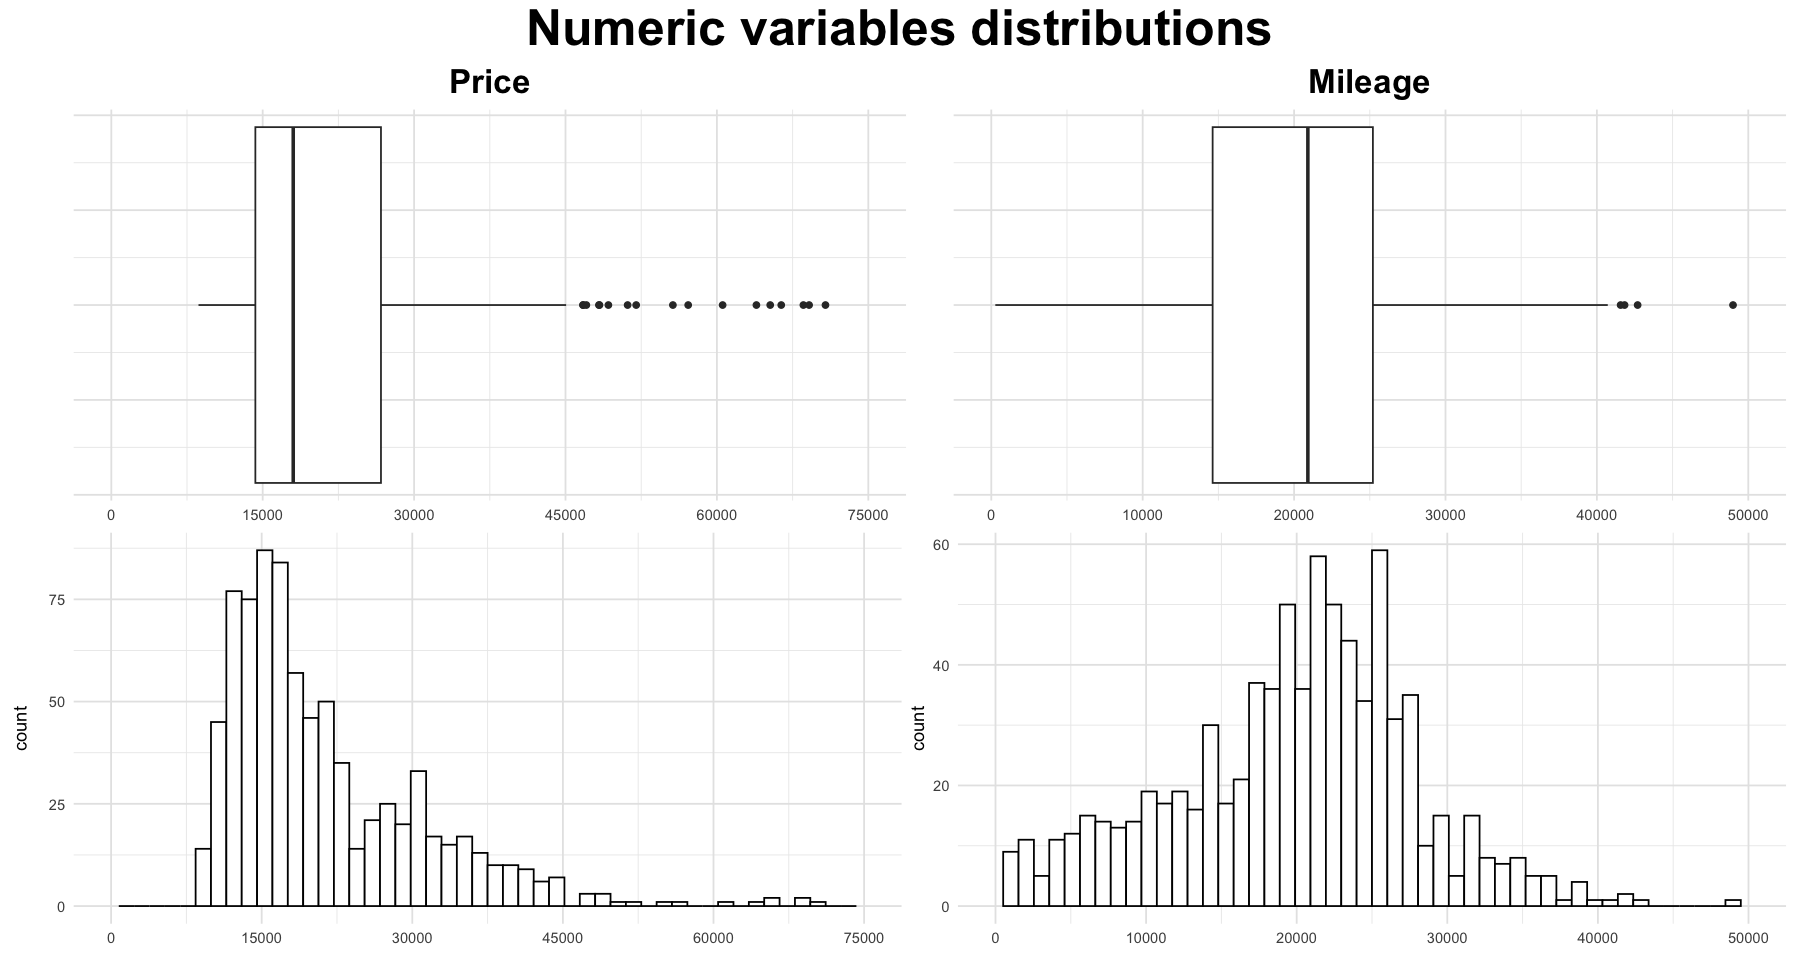

In [13]:
library(patchwork)
my_theme <- theme_minimal() +
  theme(
    panel.grid.major = element_line(color = "grey90"),
    plot.margin = unit(c(1,1,1,1), "mm"),
    panel.spacing = unit(0, "mm")
  )

box1 <- ggplot(df) +
  aes(x = Price) +
  geom_boxplot() +
  my_theme +
  scale_x_continuous(limits = c(0, 75000), breaks = seq(0, 75000, by = 15000)) + 
  ggtitle("Price") +
  theme(axis.text.y = element_text(color = "white"),
        axis.title.x = element_blank(),
        plot.title = element_text(size = 20, face = "bold", hjust = .5))

hist1 <- ggplot(df) +
  aes(x = Price) +
  geom_histogram(bins = 50, fill = "white", color = "black") +
  my_theme +
  scale_x_continuous(limits = c(0, 75000), breaks = seq(0, 75000, by = 15000)) + 
  theme(axis.title.x = element_blank())

box2 <- ggplot(df) +
  aes(x = Mileage) +
  geom_boxplot() +
  my_theme +
  scale_x_continuous(limits = c(0, 50000), breaks = seq(0, 50000, by = 10000)) + 
  ggtitle("Mileage") +
  theme(axis.text.y = element_text(color = "white"),
        axis.title.x = element_blank(), 
        plot.title = element_text(size = 20, face = "bold", hjust = .5))

hist2 <- ggplot(df) +
  aes(x = Mileage) +
  geom_histogram(bins = 50, fill = "white", color = "black") +
  my_theme +
  scale_x_continuous(limits = c(0, 50000), breaks = seq(0, 50000, by = 10000)) + 
  theme(axis.title.x = element_blank())


(box1 | box2) / 
(hist1 | hist2) +
  plot_annotation(
    title = "Numeric variables distributions",
    theme = theme(
      plot.title = element_text(size = 30, face = "bold", hjust = .5, margin = margin(b = 5))
    )
  )

### Zmienne kategorialne

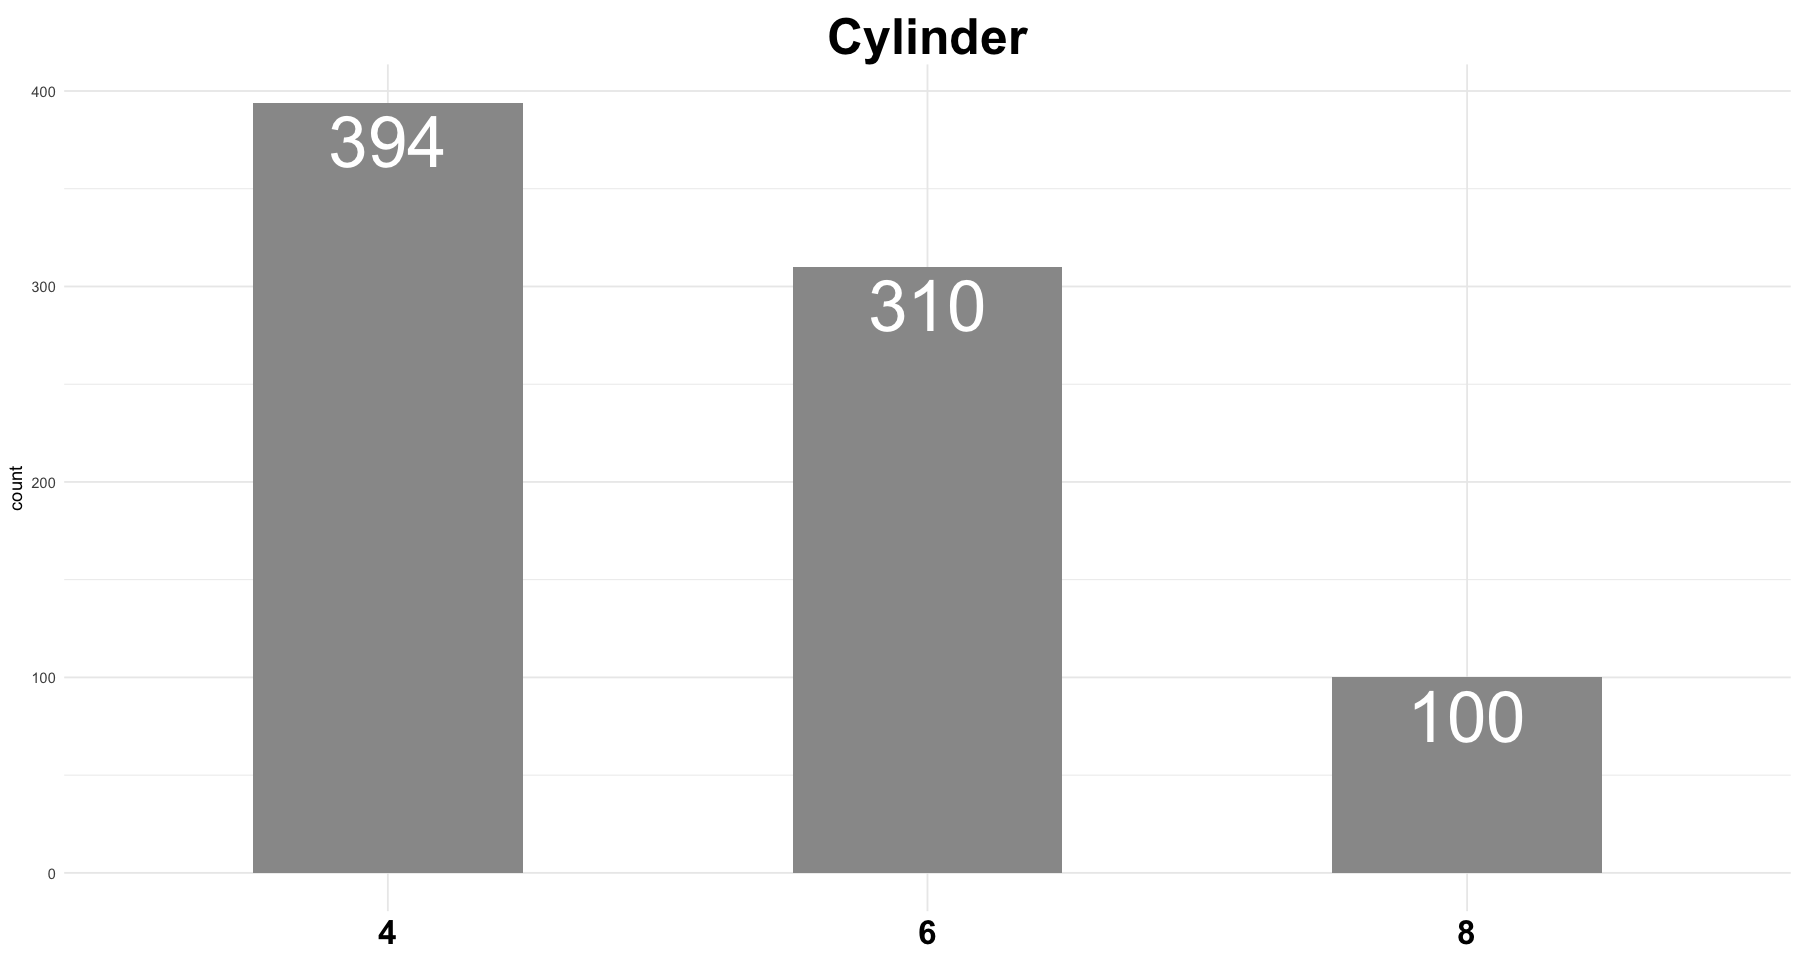

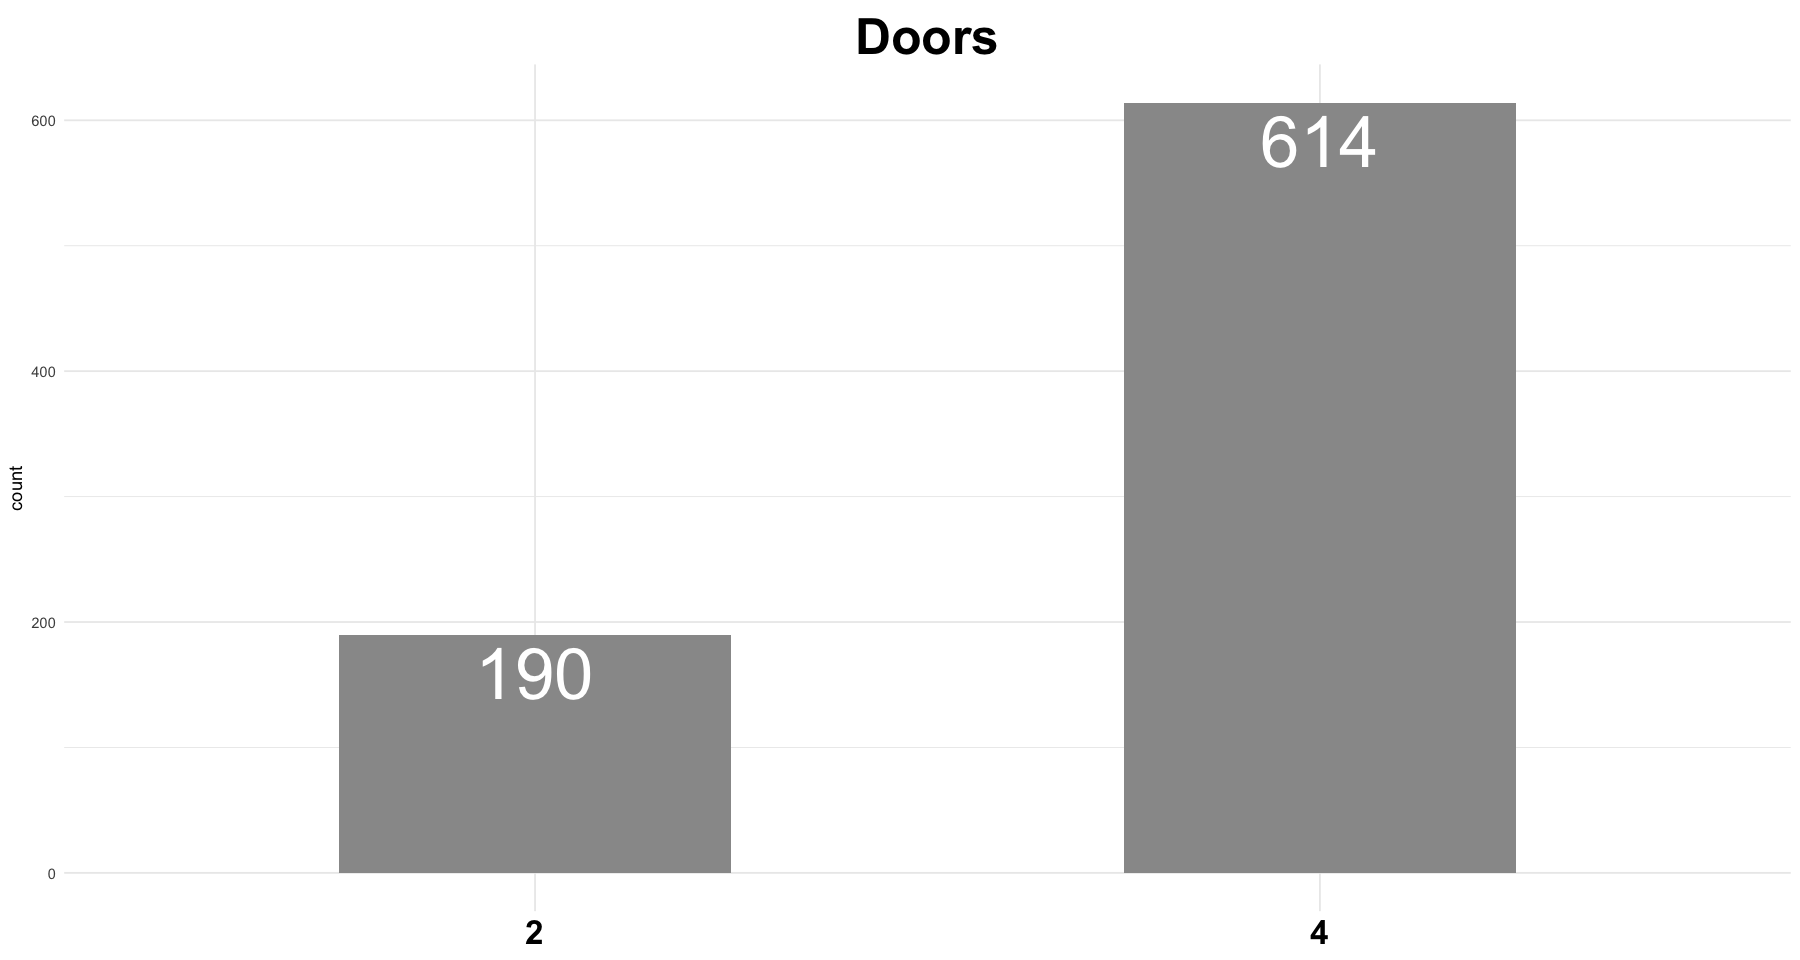

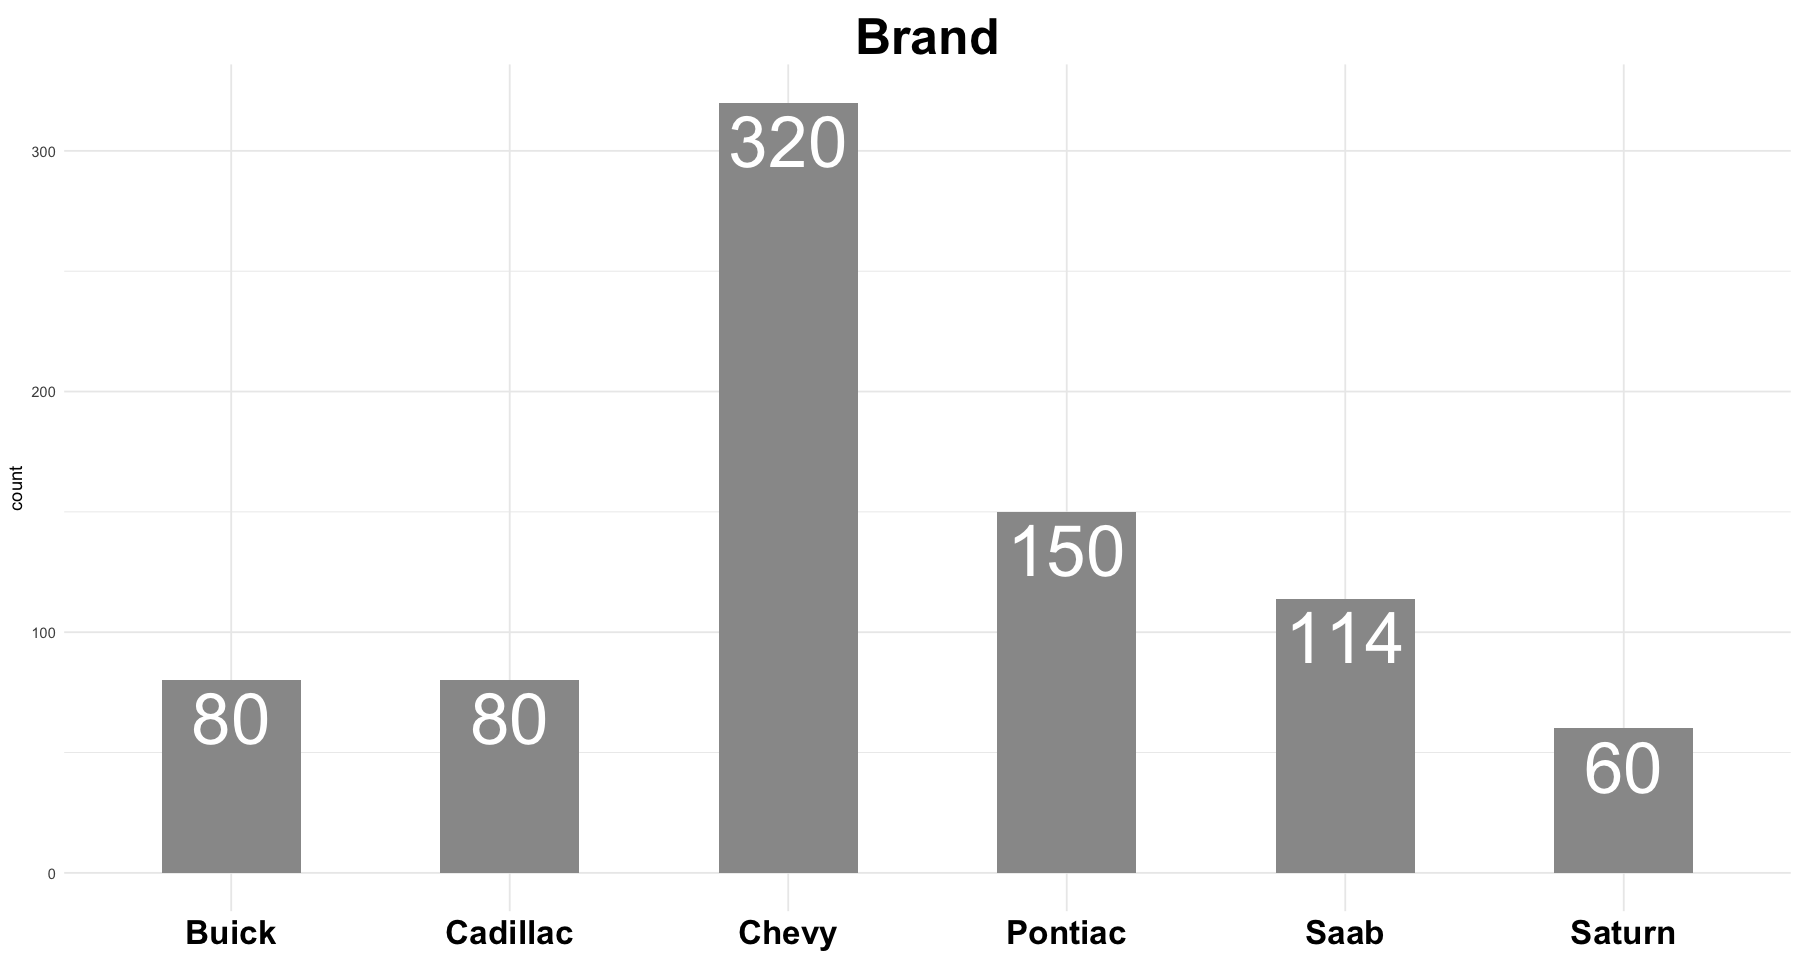

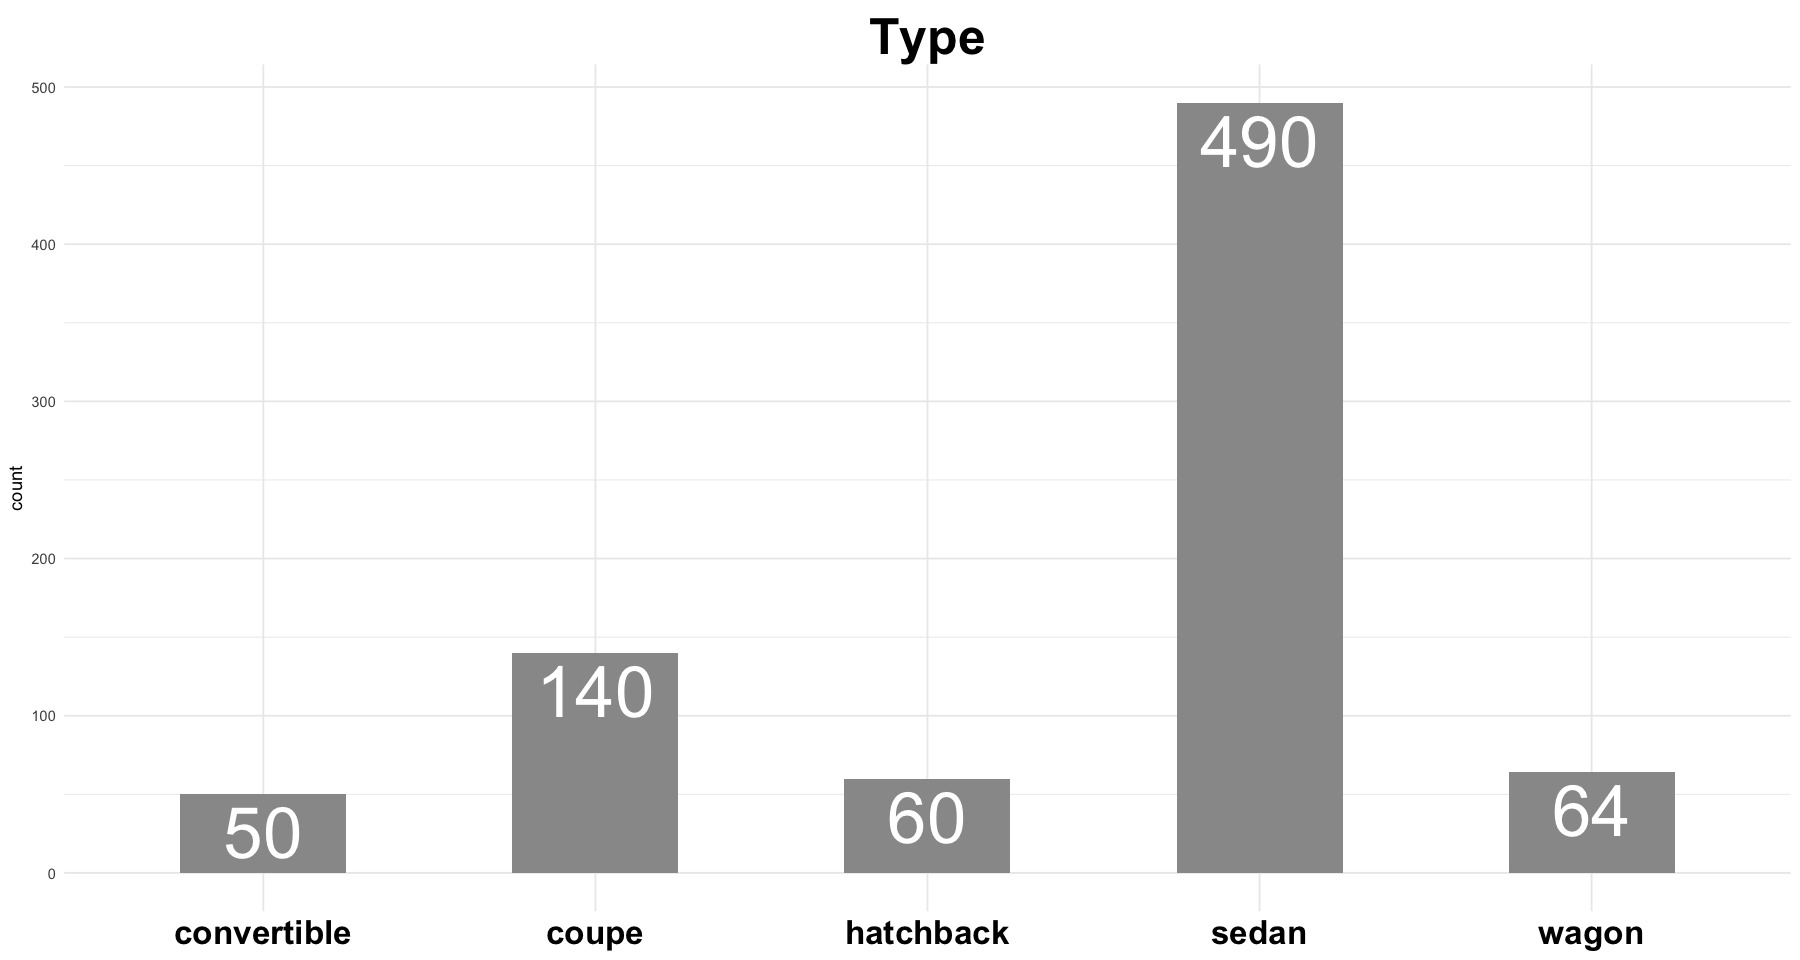

In [14]:
for (col in c("Cylinder", "Doors", "Brand", "Type")){
plot <- ggplot(df) + 
    aes(x = df[[col]]) + 
    geom_bar(width = .5, fill = rgb(.6, .6, .6)) + 
    geom_text(stat = "count", aes(label = ..count..), vjust = 1.25, size = 15, color = "white") +
    theme_minimal() + 
    ggtitle(col) +
    theme(
        axis.text.x = element_text(size = 20, face = "bold", color = "black"),
        axis.title.x = element_blank(),
        plot.title = element_text(size = 30, face = "bold", hjust = .5, margin = margin(t = 5)),
    )
print(plot)
}

### Zmienne binarne

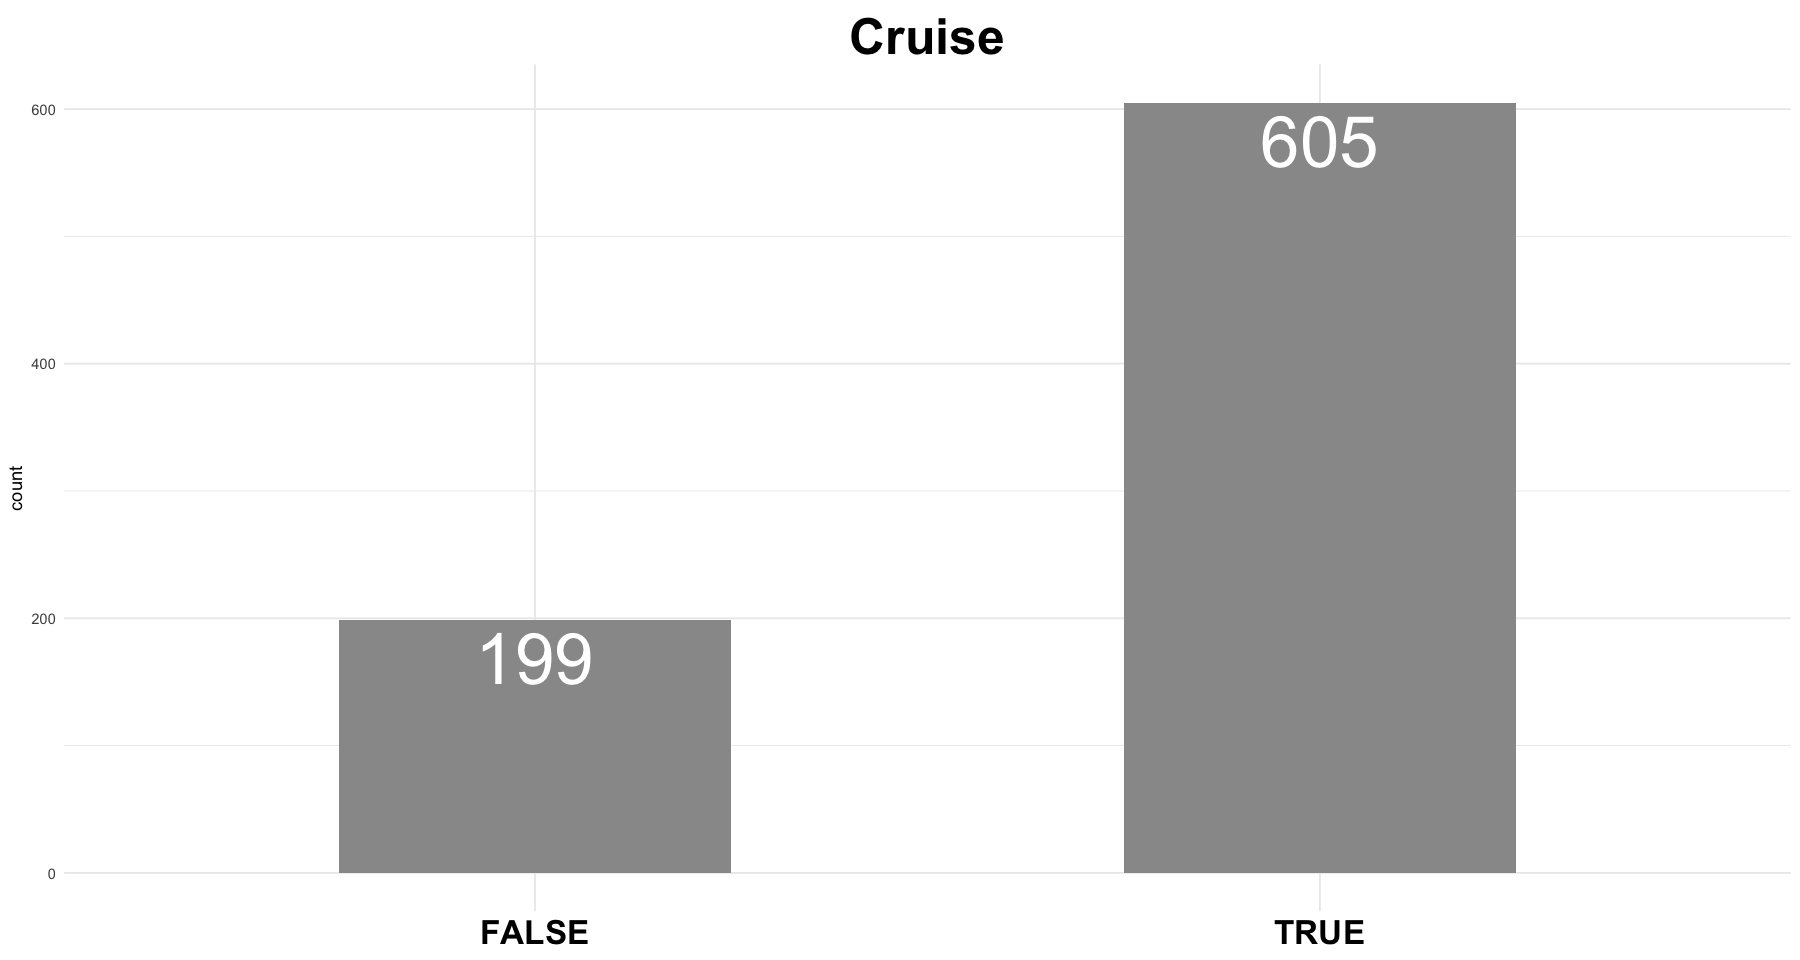

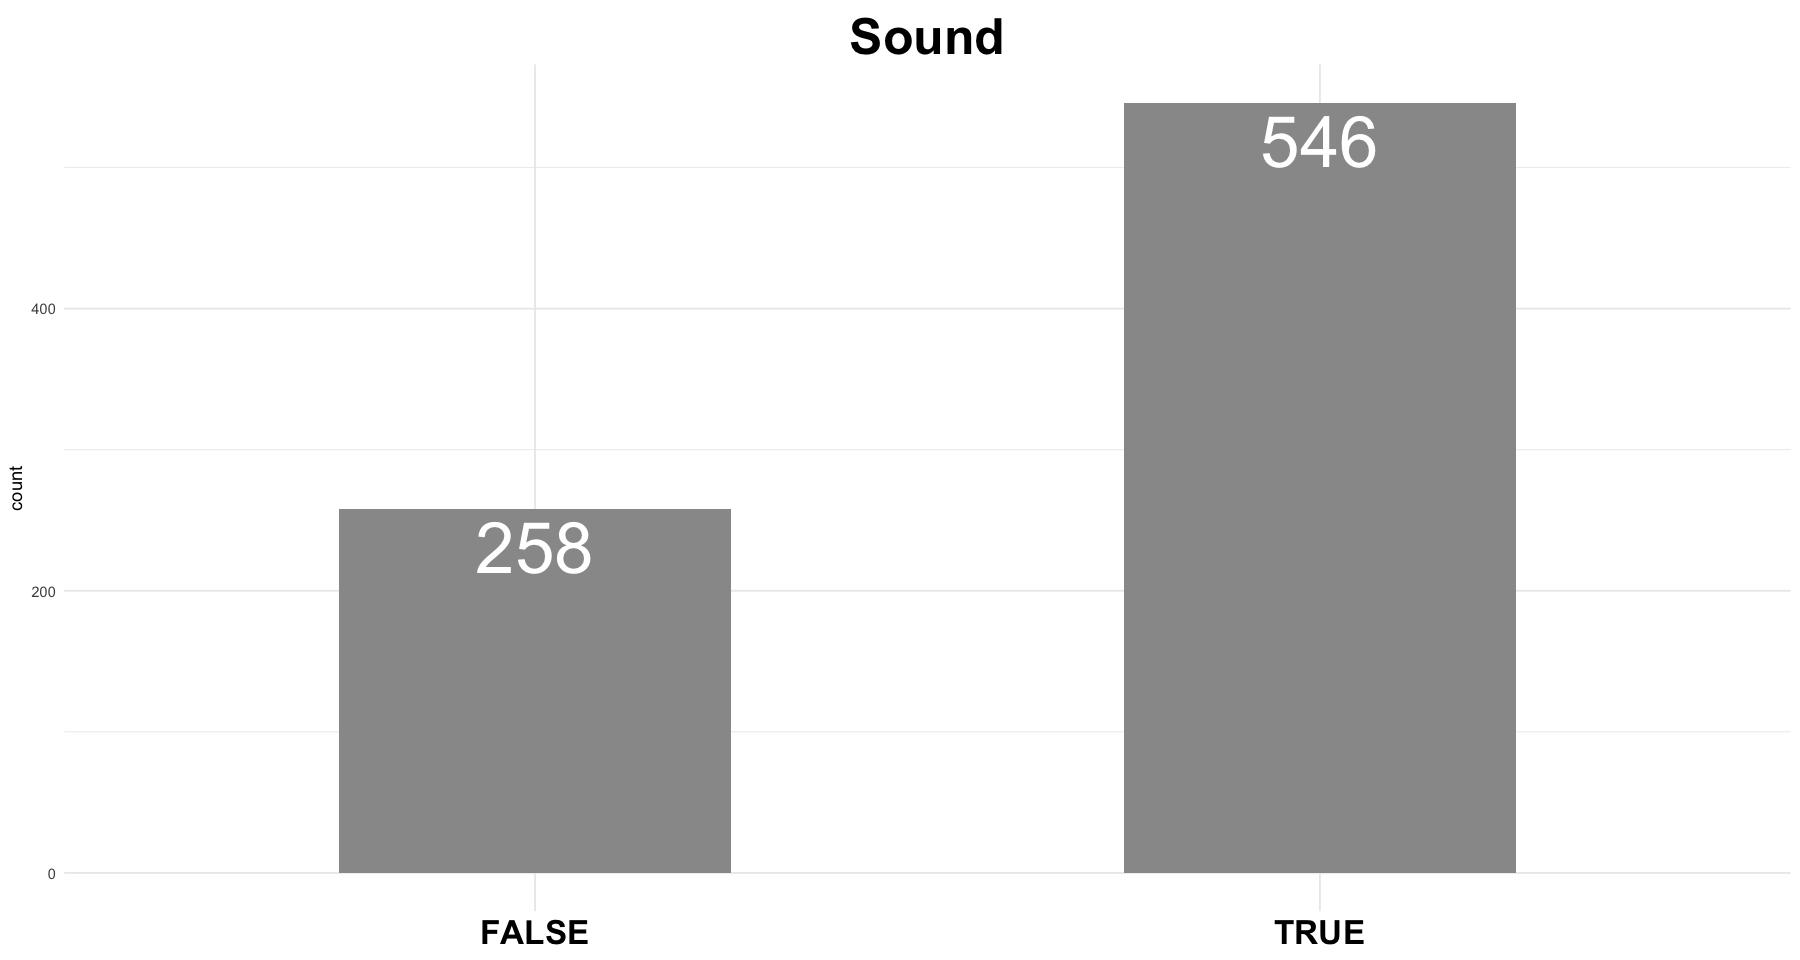

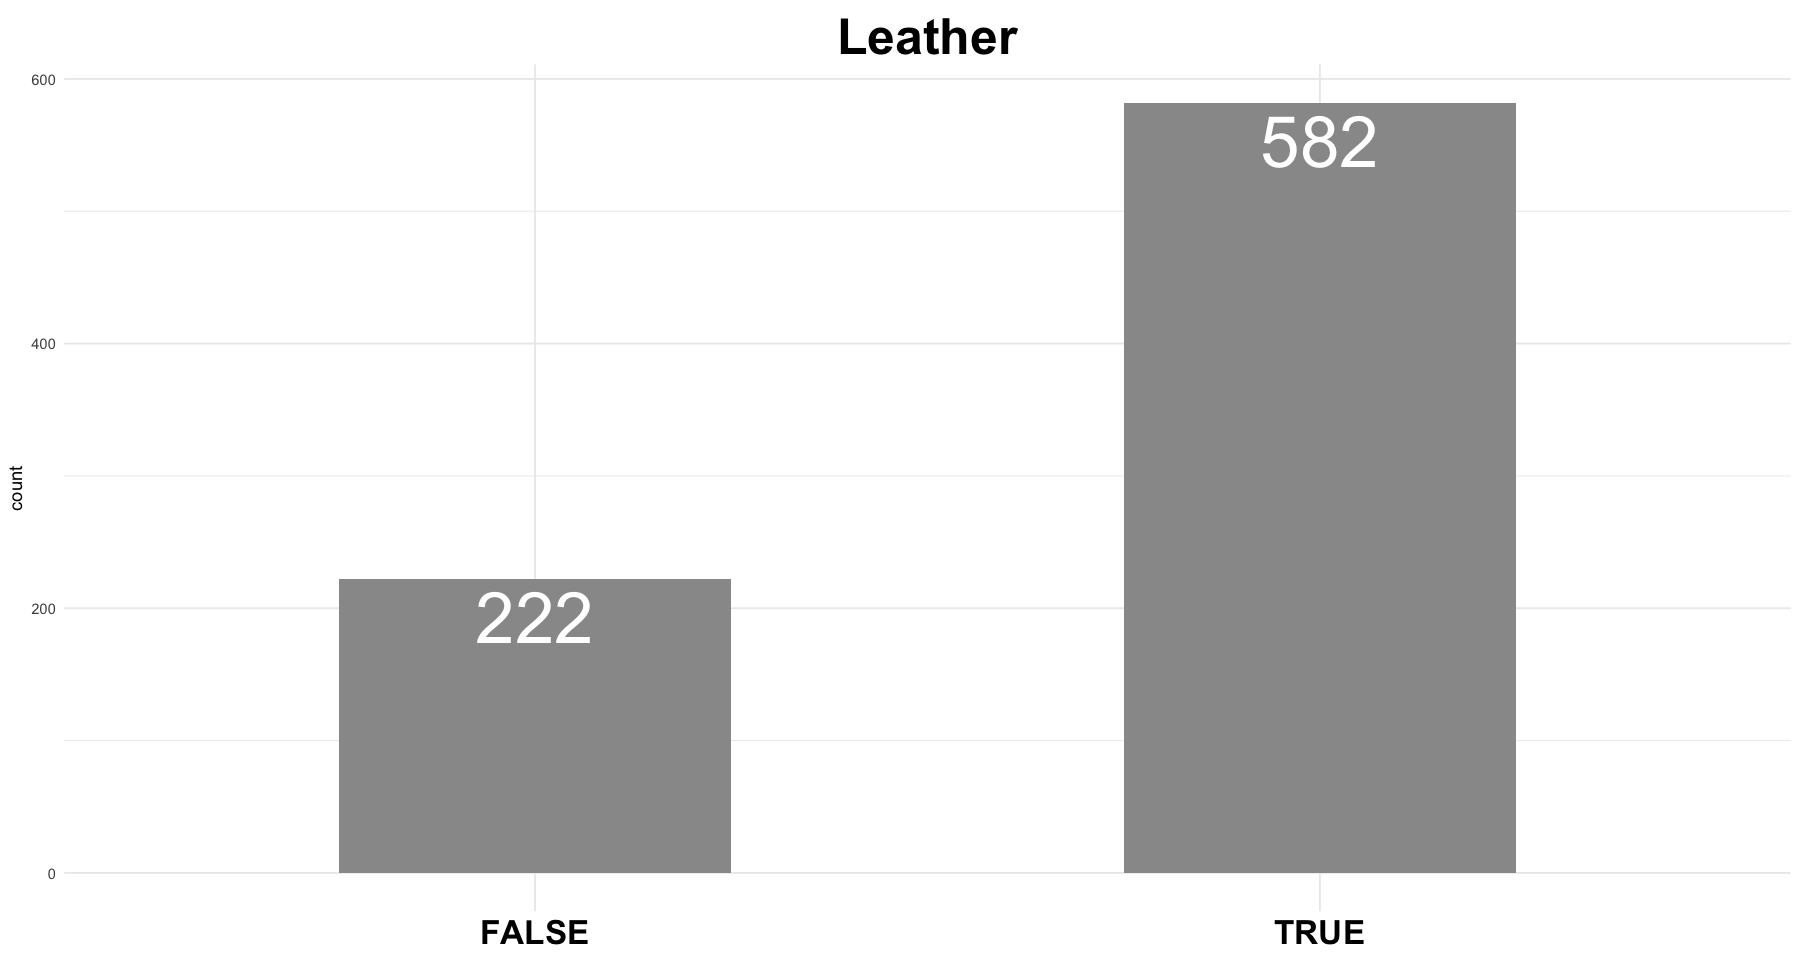

In [15]:
for (col in c("Cruise", "Sound", "Leather")){
plot <- ggplot(df) + 
    aes(x = df[[col]]) + 
    geom_bar(width = .5, fill = rgb(.6, .6, .6)) + 
    geom_text(stat = "count", aes(label = ..count..), vjust = 1.25, size = 15, color = "white") +
    theme_minimal() + 
    ggtitle(col) +
    theme(
        axis.text.x = element_text(size = 20, face = "bold", color = "black"),
        axis.title.x = element_blank(),
        plot.title = element_text(size = 30, face = "bold", hjust = .5, margin = margin(t = 5)),
    )
print(plot)
}

## 3.2 Eksploracja marek i typów samochodow

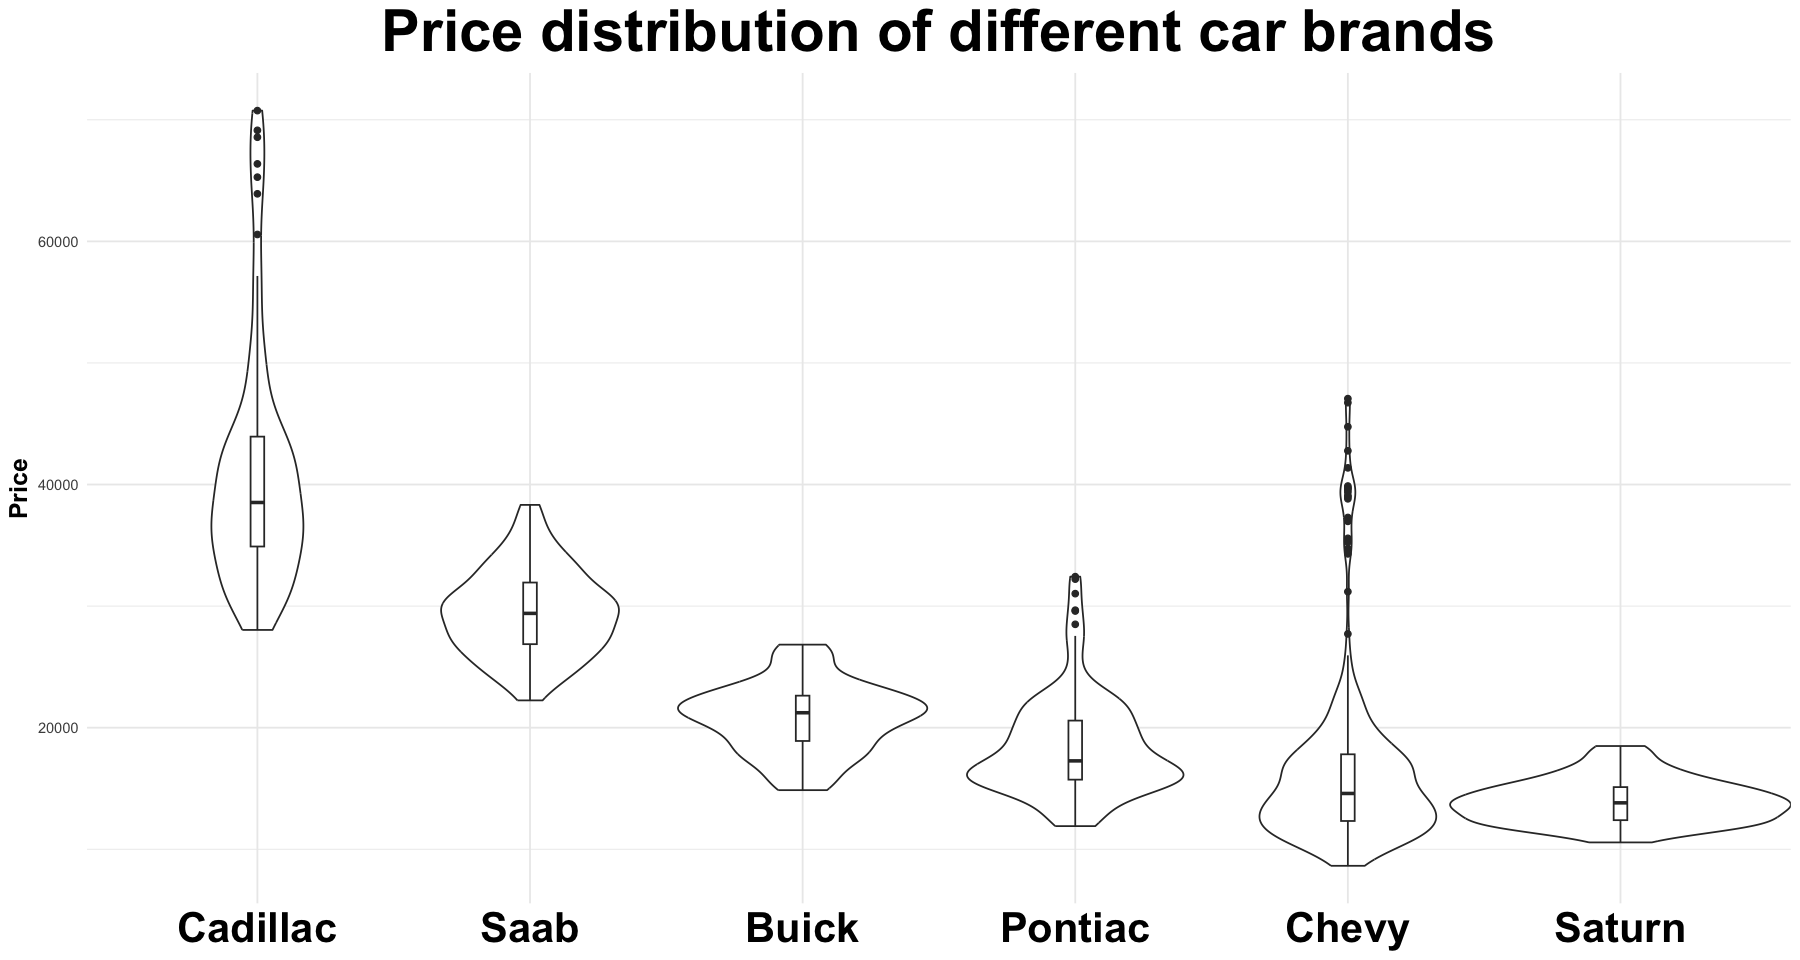

In [16]:
df %>%
    ggplot() + 
        aes(x = fct_reorder(Brand, Price, .fun = mean, .desc = T), y = Price) +
        geom_violin(width = 1.25) +
        geom_boxplot(width = .05) + 
        ggtitle("Price distribution of different car brands") +
        theme_minimal() + 
        theme(axis.text.x = element_text(size = 25, 
                                         face = "bold", 
                                         color = "black"),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size = 15,
                                          face = "bold"),
              plot.title = element_text(size = 35,
                                        face = "bold",
                                        hjust = .5))

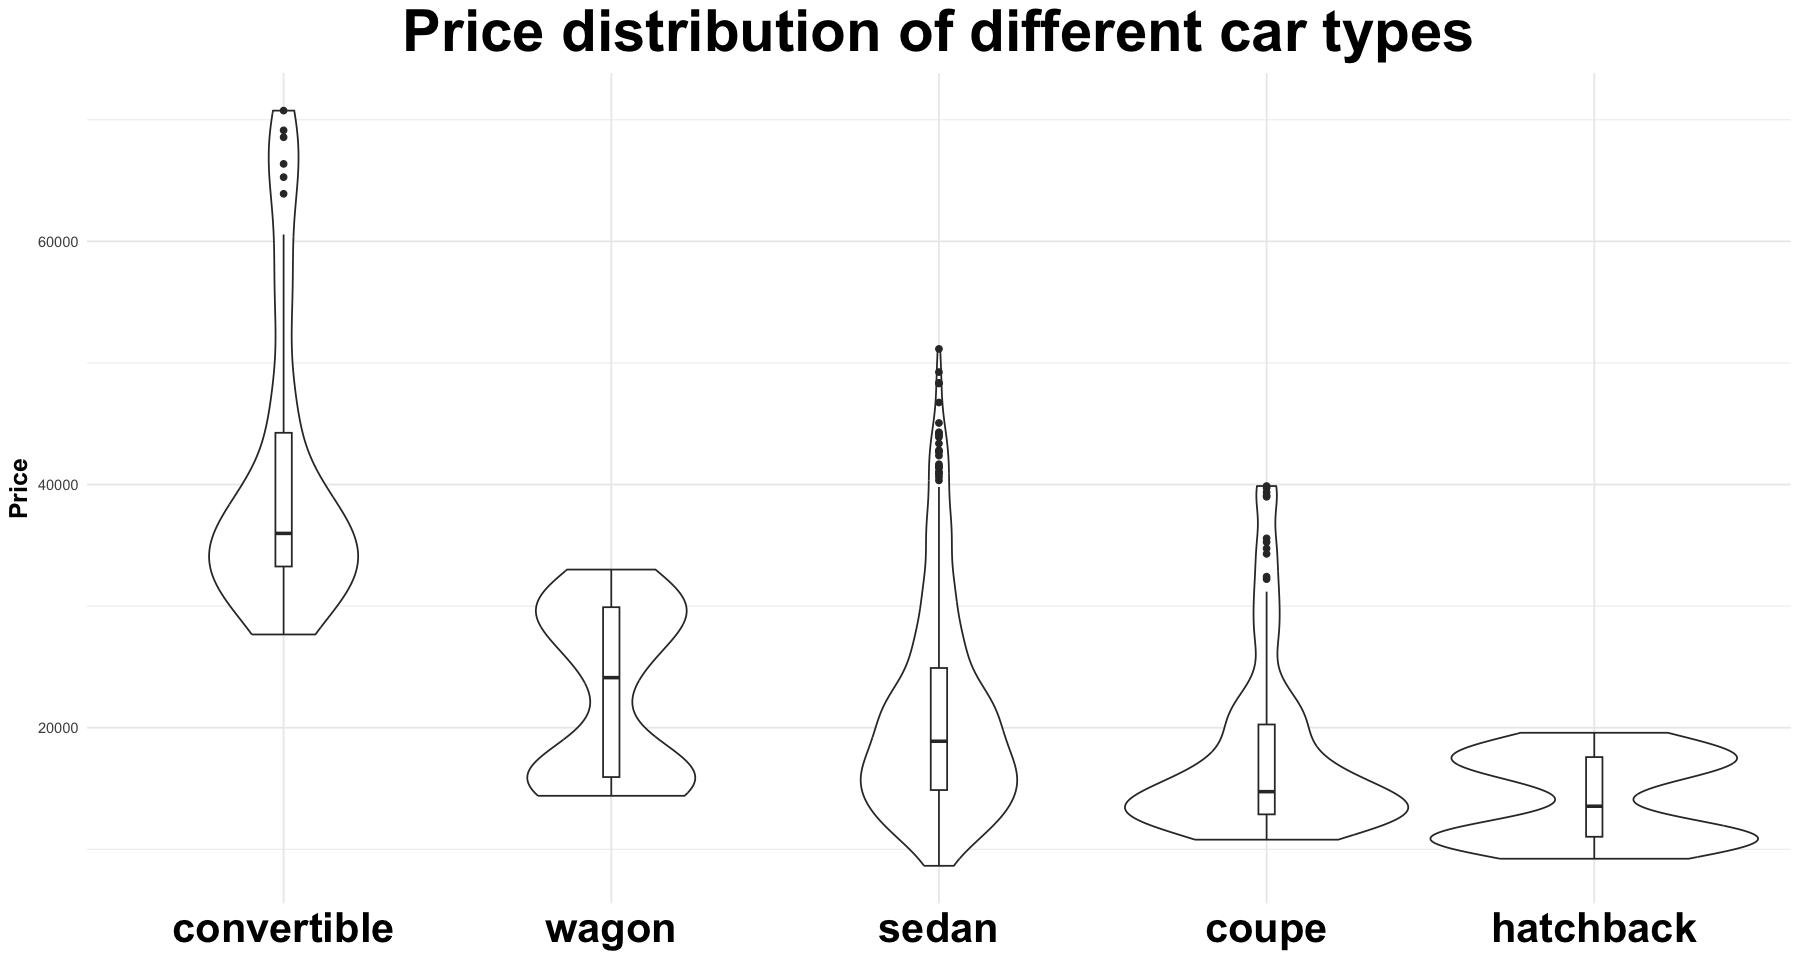

In [17]:
df %>%
    ggplot() + 
        aes(x = fct_reorder(Type, Price, .fun = mean, .desc = T), y = Price) +
        geom_violin(width = 1) +
        geom_boxplot(width = .05) + 
        ggtitle("Price distribution of different car types") +
        theme_minimal() + 
        theme(axis.text.x = element_text(size = 25, 
                                         face = "bold", 
                                         color = "black"),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size = 15,
                                          face = "bold"),
              plot.title = element_text(size = 35,
                                        face = "bold",
                                        hjust = .5))

In [18]:
df %>%
    group_by(Brand, Type) %>%
    summarise(mean_price = mean(Price), 
              no_cars = n()) %>%
    arrange(desc(no_cars), desc(mean_price))

`summarise()` has grouped output by 'Brand'. You can override using the
`.groups` argument.


   Brand    Type        mean_price no_cars
1  Chevy    sedan       14859.82   160    
2  Pontiac  sedan       18954.00    90    
3  Chevy    coupe       17933.20    90    
4  Buick    sedan       20815.11    80    
5  Cadillac sedan       37793.14    70    
6  Chevy    hatchback   14170.93    60    
7  Saab     sedan       27573.28    50    
8  Saturn   sedan       13761.49    40    
9  Saab     wagon       29016.18    34    
10 Saab     convertible 33239.40    30    
11 Pontiac  coupe       19317.11    30    
12 Pontiac  wagon       15881.39    30    
13 Saturn   coupe       14413.44    20    
14 Cadillac convertible 62938.74    10    
15 Chevy    convertible 41501.60    10    

### Sankey diagram

Podział ceny i przebiegu na równe pod względem odległości od siebie przedziały (załózmy, ze to podzial typu malo, srednio i duzo)

In [19]:
df$Price_inThousandsUSD = cut(df$Price/1000, breaks = 5, include.lowest = T, dig.lab = 2)
# df$Mileage_Thousands = cut(df$Mileage/1000, breaks = 3, include.lowest = T, dig.lab = 2)

In [20]:
head(df)

  Price    Mileage Cylinder Doors Cruise Sound Leather Brand Type       
1 22661.05 20105   6        4     TRUE   FALSE FALSE   Buick sedan      
2 21725.01 13457   6        2     TRUE    TRUE FALSE   Chevy coupe      
3 29142.71 31655   4        2     TRUE    TRUE  TRUE   Saab  convertible
4 30731.94 22479   4        2     TRUE   FALSE FALSE   Saab  convertible
5 33358.77 17590   4        2     TRUE    TRUE  TRUE   Saab  convertible
6 30315.17 23635   4        2     TRUE   FALSE FALSE   Saab  convertible
  Price_inThousandsUSD
1 (21,33]             
2 (21,33]             
3 (21,33]             
4 (21,33]             
5 (21,33]             
6 (21,33]             

In [21]:
# korzystam z: https://r-charts.com/flow/sankey-diagram-ggplot2/
# install.packages("remotes")
# remotes::install_github("davidsjoberg/ggsankey")
library(ggsankey)

In [22]:
df_long <- df %>%
  make_long(Cylinder, Doors, Type, Brand, Price_inThousandsUSD)

head(df_long)

  x                    node    next_x               next_node
1 Cylinder             6       Doors                4        
2 Doors                4       Type                 sedan    
3 Type                 sedan   Brand                Buick    
4 Brand                Buick   Price_inThousandsUSD (21,33]  
5 Price_inThousandsUSD (21,33] NA                   NA       
6 Cylinder             6       Doors                2        

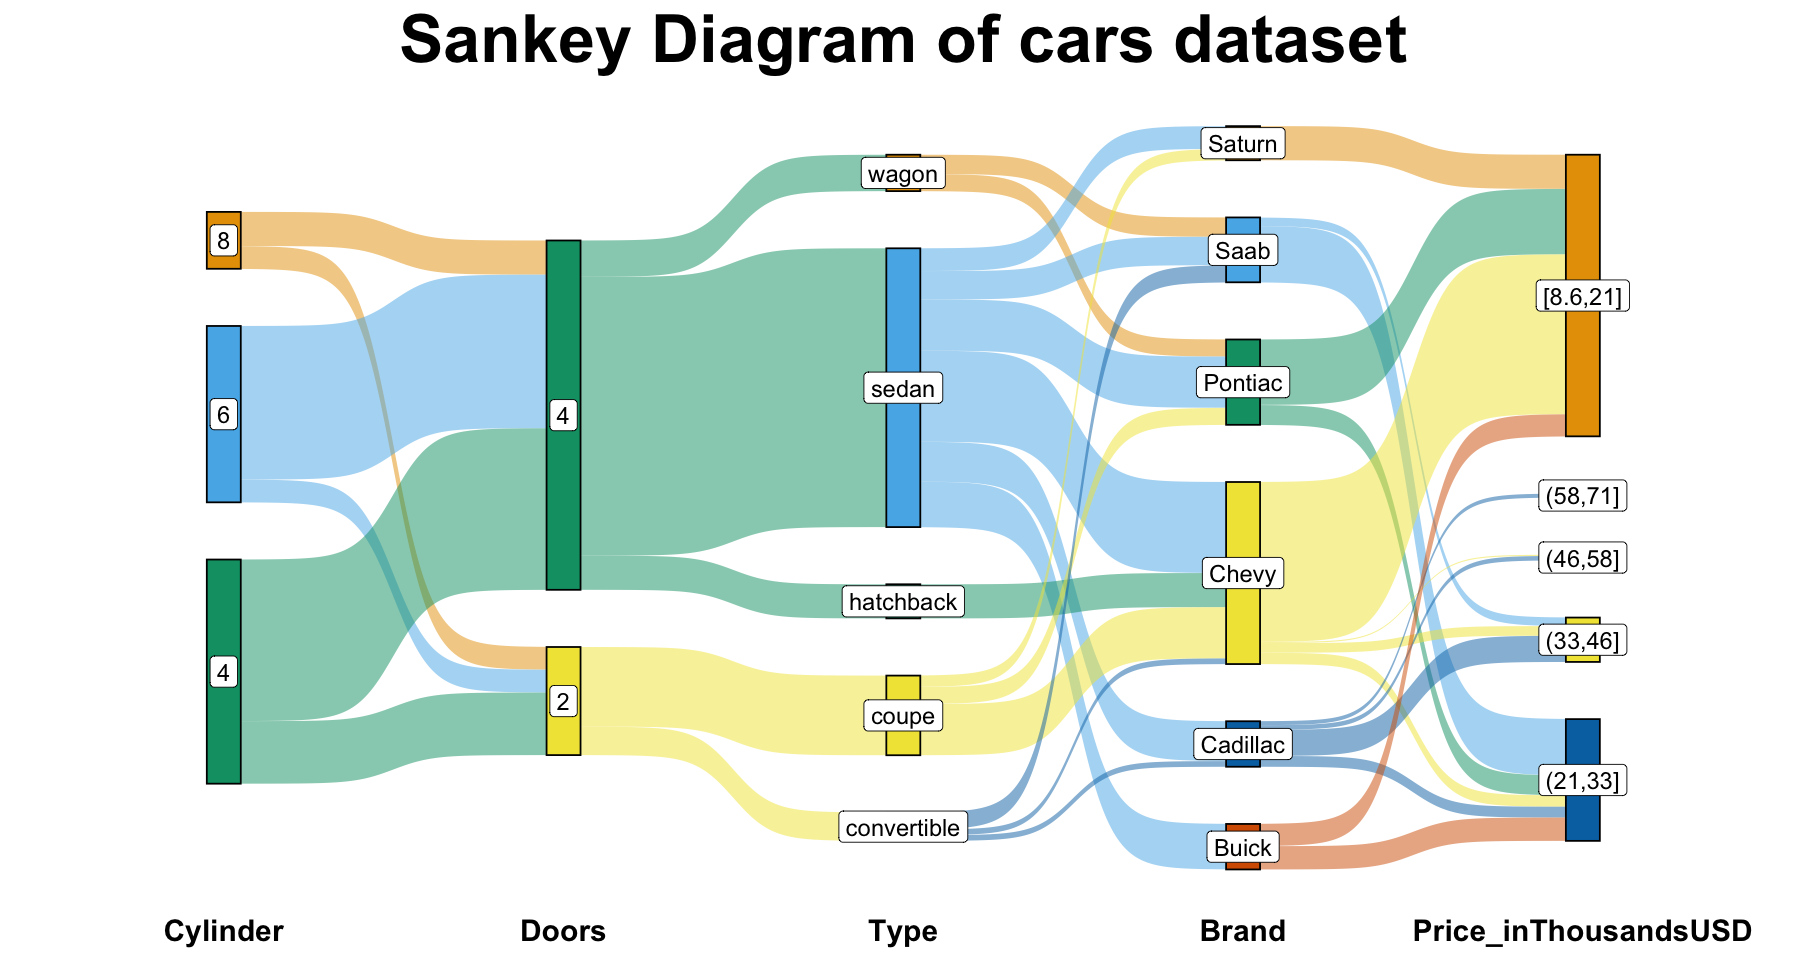

In [23]:
brand_colors <- c(
  "Saturn" = "#E69F00",
  "Saab" = "#56B4E9", 
  "Pontiac" = "#009E73",
  "Chevy" = "#F0E442",
  "Cadillac" = "#0072B2",
  "Buick" = "#D55E00"
)

type_colors <- c(
  "wagon" = "#E69F00",
  "sedan" = "#56B4E9",
  "hatchback" = "#009E73",
  "coupe" = "#F0E442",
  "convertible" = "#0072B2"
)

cylinder_colors <- c(
  "8" = "#E69F00",
  "6" = "#56B4E9",
  "4" = "#009E73",
  "2" = "#F0E442"
)

door_colors <- c(
  "4" = "#E69F00",
  "2" = "#56B4E9"
)

interval_colors <- c(
  "[8.6,21]" = "#E69F00",
  "(58,71]" = "#56B4E9",
  "(46,58]" = "#009E73",
  "(33,46]" = "#F0E442",
  "(21,33]" = "#0072B2"  
)
all_colors <- c(brand_colors, type_colors, cylinder_colors, door_colors, interval_colors)

ggplot(df_long, aes(x = x, 
               next_x = next_x, 
               node = node, 
               next_node = next_node,
               fill = factor(node),
               label = node)) +
  geom_sankey(flow.alpha = 0.5, node.color = 1) +
  geom_sankey_label(size = 5, color = 1, fill = "white") +
#   scale_fill_viridis_d(option = "D") +
  scale_fill_manual(values = all_colors) +
  theme_sankey(base_size = 16) +
  ggtitle("Sankey Diagram of cars dataset") +
  theme(legend.position = "none",
        axis.title.x = element_blank(),
        axis.text.x = element_text(face = "bold", color = "black", size = 18),
        plot.title = element_text(size = 40, face = "bold", hjust = .5)) 

Wnioski z wykresu:  
- typy aut `coupe` i `convertible` maja 2 drzwi, reszta ma 4
- `Saab` i `Pontiac` to tylko dwie firmy produkujace auta typu `wagon`
- kazda marka ma w swojej ofercie w datasecie auto typu `sedan`
- tylko `Chevrolet` produkuje auta typu `hatchback`
- `Buick` ma tylko auta typu `sedan`
- `Cadillac` robi najdrozsze auta, bo okupuja 3 gorne przedzialy cenowe
- `Chevy` i `Cadillac` sa najbardziej roznorodne cenowo - maja auta w 4 interwalach cenowych (widac to tez na violin plocie po dlugosci skrzypca/ilosci outlierow)

In [24]:
# TODO: grupowanie po markach/typach + regresja ceny